<a href="https://colab.research.google.com/github/RahulSinghWaldia/TITANIC-WRECK-PREDICTION/blob/main/Copy_of_TITANIC_WRECK_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style ="whitegrid")

In [ ]:
# loading the dataset
df= pd.read_csv(r"/content/sample_data/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

In [ ]:
df["Title"] = df.Name.str.strip().str.split( n = 3, expand = True)[1].replace("\W","", regex = True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [ ]:
df.isna().sum()  

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [ ]:
df[["Cabin","Survived"]].sample(10)

,Cabin,Survived
55,C52,1
864,NaN,0
735,NaN,0
470,NaN,0
1,C85,1
451,NaN,0
496,D20,1
445,A34,1
696,NaN,0
334,NaN,1


In [ ]:
female = df.loc[:, ["Survived", 'Sex']][df.loc[:, ["Survived", 'Sex']].Sex == 'female']
male = df.loc[:, ["Survived", 'Sex']][df.loc[:, ["Survived", 'Sex']].Sex == 'male']

In [ ]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

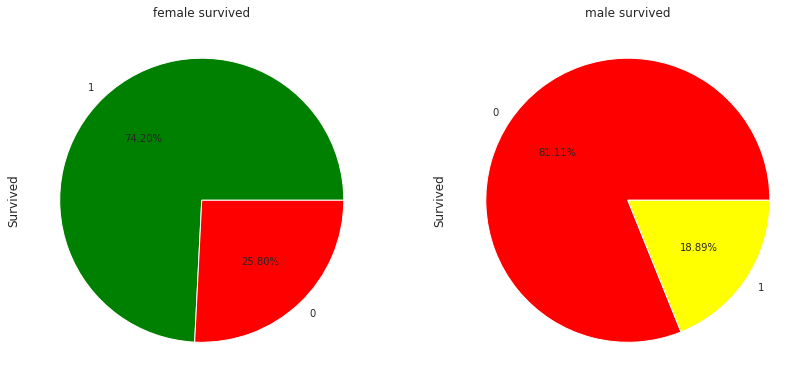

In [ ]:
fig,(ax1,ax2)= plt.subplots(figsize =(14,10), nrows = 1, ncols = 2)
female.Survived.value_counts().plot(kind = 'pie', autopct = '%1.2f%%',fontsize = 10, ax=ax1,colors = ("green","red"))
male.Survived.value_counts().plot(kind = 'pie', autopct = '%1.2f%%',fontsize = 10, ax=ax2,colors = ("red","yellow"))
ax1.set(title = 'female survived')
ax2.set(title = 'male survived');

In [ ]:
df['age_category'] = df.Age.apply(lambda x: "0-2" if 0 <= x<2 else
                                            "2-5" if 2<= x<= 5 else
                                            "6-13" if 5< x< 13 else
                                            "13-18" if 13<= x< 18 else
                                            "18-30" if 18<= x< 30 else
                                            "30-40" if 30<= x< 40 else
                                            "40-50" if 40<= x< 50 else
                                            "50-65" if 50<= x< 65 else
                                            "65+" if x>= 65 else "not known"
                                         )

In [ ]:
age_cat = df.loc[:,['Sex','Survived', 'age_category']].set_index('age_category').reset_index().pivot_table\
(index = 'age_category', columns = 'Sex', values = 'Survived', aggfunc = 'count').sort_values('age_category',ascending = True)

In [ ]:
age_cat


Sex,female,male
age_category,,
0-2,4.0,10.0
13-18,23.0,21.0
18-30,92.0,179.0
2-5,17.0,13.0
30-40,60.0,107.0
40-50,32.0,57.0
50-65,22.0,41.0
6-13,11.0,14.0
65+,NaN,11.0


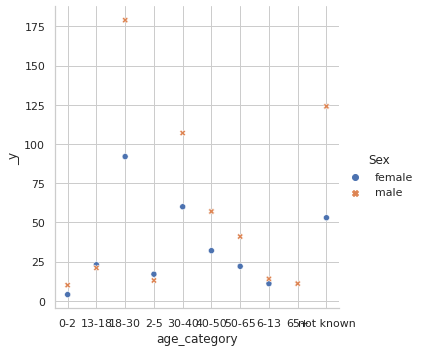

In [ ]:
sns.relplot(data = age_cat)

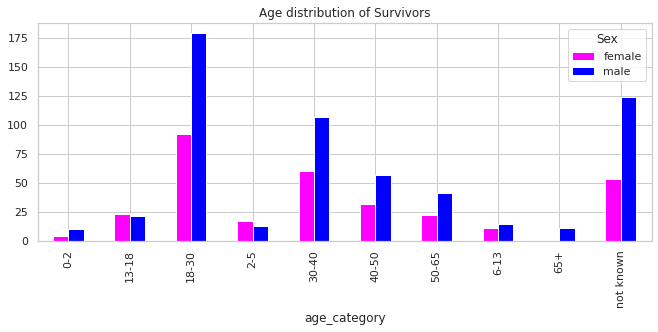

In [ ]:
fig,ax = plt.subplots(figsize =(11,4))
age_cat.plot(kind = 'bar',ax=ax, color = ("magenta","blue"))
ax.set(title = 'Age distribution of Survivors');

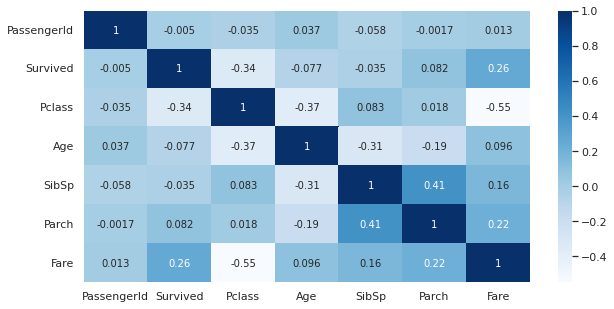

In [ ]:
fig,ax = plt.subplots(figsize = (10,5))
sns.heatmap(df.corr(), annot = True, cmap="Blues")

In [ ]:
df.Age.fillna(df.Age.mean(), inplace= True)

In [ ]:
df.Embarked.fillna("S", inplace  = True)

In [ ]:
df["Cabin_alpha"] = df.Cabin.str.replace("\d","", regex = True)
df.drop("Cabin", axis =1, inplace = True)

In [ ]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,age_category,Cabin_alpha
203,204,0,3,"Youseff, Mr. Gerious",male,45.500000,0,0,2628,7.2250,C,Mr,40-50,NaN
792,793,0,3,"Sage, Miss. Stella Anna",female,29.699118,8,2,CA. 2343,69.5500,S,Miss,not known,NaN
554,555,1,3,"Ohman, Miss. Velin",female,22.000000,0,0,347085,7.7750,S,Miss,18-30,NaN
477,478,0,3,"Braund, Mr. Lewis Richard",male,29.000000,1,0,3460,7.0458,S,Mr,18-30,NaN
743,744,0,3,"McNamee, Mr. Neal",male,24.000000,1,0,376566,16.1000,S,Mr,18-30,NaN


In [ ]:
df.Cabin_alpha.value_counts()

C          51
B          36
E          32
D          32
A          15
F           9
B B         7
G           4
C C C       4
C C         4
F G         3
B B B B     2
B B B       2
D D         1
F E         1
T           1
Name: Cabin_alpha, dtype: int64

In [ ]:
pd.crosstab(df.Cabin_alpha, df.Survived)

Survived,0,1
Cabin_alpha,,
A,8,7
B,9,27
B B,2,5
B B B,1,1
B B B B,0,2
C,20,31
C C,2,2
C C C,2,2
D,8,24


In [ ]:
df.Cabin_alpha.fillna("m", inplace = True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df.Embarked = le.fit_transform(df.Embarked)
df.Cabin_alpha = le.fit_transform(df.Cabin_alpha)
df.Title = le.fit_transform(df.Title)
df.Sex= le.fit_transform(df.Sex)

In [ ]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,age_category,Cabin_alpha
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2,17,18-30,16
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0,18,30-40,5
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2,14,18-30,16


In [ ]:
X = df[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked","Title","Cabin_alpha"]]
y = df["Survived"]
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Cabin_alpha
0,3,1,22.0,1,0,7.2500,2,17,16
1,1,0,38.0,1,0,71.2833,0,18,5
2,3,0,26.0,0,0,7.9250,2,14,16
3,1,0,35.0,1,0,53.1000,2,18,5
4,3,1,35.0,0,0,8.0500,2,17,16


In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_res, y_res = sm.fit_resample(X, y)

In [ ]:
# import estimator
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

from sklearn.model_selection import train_test_split
X_train, X_test ,y_train ,y_test = train_test_split (X_res, y_res, test_size = 0.2)  

lgr = LogisticRegression(max_iter=1000)
clf = RandomForestClassifier(n_estimators=300, max_depth=13, random_state=0 )

lgr.fit(X_train, y_train)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=13, n_estimators=300, random_state=0)

In [ ]:
print(f'RandomForestClassifier Training Score   =     {clf.score(X_train, y_train)*100:.2f}%')
print(f"RandomForestClassifier Test Score       =     {clf.score(X_test, y_test)*100:.2f}%")
print(f"LogisticRegression Training Score       =     {lgr.score(X_train, y_train)*100:.2f}%")
print(f"LogisticRegression Training Score       =     {lgr.score(X_test, y_test)*100:.2f}%")

RandomForestClassifier Training Score   =     97.27%
RandomForestClassifier Test Score       =     88.18%
LogisticRegression Training Score       =     80.30%
LogisticRegression Training Score       =     85.45%


In [ ]:
y_preds = clf.predict(X_test)
y_preds[:10]

array([1, 1, 0, 1, 1, 0, 0, 0, 1, 0])

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       120
           1       0.84      0.91      0.87       100

    accuracy                           0.88       220
   macro avg       0.88      0.88      0.88       220
weighted avg       0.88      0.88      0.88       220



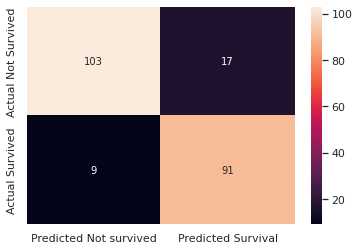

In [ ]:
cm = confusion_matrix(y_test, y_preds)
pd.DataFrame(cm, columns = ['Predicted Not survived', 'Predicted Survival'], index = ['Actual Not Survived', 'Actual Survived'])
sns.heatmap(pd.DataFrame(cm, columns = ['Predicted Not survived', 'Predicted Survival'], index = ['Actual Not Survived', 'Actual Survived']), annot = True, fmt= 'd')

In [ ]:
df_test = pd.read_csv(r"/content/sample_data/test.csv")

In [ ]:
df_test[:2]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [ ]:
df_test["Title"] = df_test.Name.str.strip().str.split( n = 3, expand = True)[1].replace("\W","", regex = True)

In [ ]:
df_test.Fare = df_test.Fare .fillna(df_test.Fare.mean())
df_test.Age = df_test.Age .fillna(df_test.Age.mean())

In [ ]:
df_test["Cabin_alpha"] = df_test.Cabin.str.replace("\d","", regex = True)

In [ ]:
df_test.drop("Cabin", axis =1, inplace = True)

In [ ]:
df_test.Cabin_alpha.fillna("m", inplace = True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_test.Embarked = le.fit_transform(df_test.Embarked)
df_test.Cabin_alpha = le.fit_transform(df_test.Cabin_alpha)
df_test.Title = le.fit_transform(df_test.Title)
df_test.Sex= le.fit_transform(df_test.Sex)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_res, y_res = sm.fit_resample(X, y)

In [ ]:
Xn = df_test[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked","Title","Cabin_alpha"]]

In [ ]:
Xn

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Cabin_alpha
0,3,1,34.50000,0,0,7.8292,1,9,16
1,3,0,47.00000,1,0,7.0000,2,10,16
2,2,1,62.00000,0,0,9.6875,1,9,16
3,3,1,27.00000,0,0,8.6625,2,9,16
4,3,0,22.00000,1,1,12.2875,2,10,16
...,...,...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,2,9,16
414,1,0,39.00000,0,0,108.9000,0,15,5
415,3,1,38.50000,0,0,7.2500,2,9,16
416,3,1,30.27259,0,0,8.0500,2,9,16


In [ ]:
predicted = clf.predict(Xn)
pred_df = pd.DataFrame(predicted, columns = ["Survived"])

In [ ]:
passengerid = df_test[["PassengerId"]]

In [ ]:
#merged the dataframes
titanic = pd.concat( [passengerid,pred_df],ignore_index = False, axis = 1)
titanic

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
# Saving the model
import pickle

print("SAVING THE RandomForestClassifier MODEL to pkl".center(80,"*"))

print()
pickle.dump(clf, open("model.pkl", "wb"))

titanic.to_csv('titanic.csv', index=False)
print("DATAFRAME IS NOW SAVED".center(50,"*"))

*****************SAVING THE RandomForestClassifier MODEL to pkl*****************

**************DATAFRAME IS NOW SAVED**************
